In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [4]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/depression/stu_fem.xlsx')
data.head()


,2. Marital status,3. Studying in,4. Family income (BDT),5. Family type,1. UCLA1,1. UCLA2,1. UCLA3,1. GAD-1,1. GAD-2,1. GAD-3,...,1. GAD-7,PHQ-1,PHQ-2,PHQ-3,PHQ-4,PHQ-5,PHQ-6,PHQ-7,PHQ-8,PHQ-9
0,Unmarried,Graduate level,"41,000-100,000",Joint family,1,1,2,0,1,3,...,0,0,3,3,0,3,3,0,0,0
1,Unmarried,Graduate level,"41,000-100,000",Nuclear family,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,Unmarried,Graduate level,"41,000-100,000",Joint family,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Married,Graduate level,"41,000-100,000",Nuclear family,1,2,1,1,3,1,...,0,0,1,2,1,0,0,0,1,0
4,Unmarried,Undergraduate level,"41,000-100,000",Nuclear family,2,1,2,2,2,2,...,0,1,2,1,2,1,0,2,2,0


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/depression/stu_fem.xlsx')

# Columns for label encoding
label_encode_columns = [
    '2. Marital status ',
    '3. Studying in',
    '4. Family income (BDT) ',
    '5. Family type'
]

# Apply label encoding
label_encoders = {}
for column in label_encode_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Save the processed data to a new CSV file
data.to_excel('/content/drive/MyDrive/depression/stu_fem1.xlsx', index=False)

# Display the first few rows of the encoded data
print(data.head())


   2. Marital status   3. Studying in  4. Family income (BDT)   \
0                   2               0                        0   
1                   2               0                        0   
2                   2               0                        0   
3                   1               0                        0   
4                   2               1                        0   

   5. Family type  1. UCLA1  1. UCLA2  1. UCLA3  1. GAD-1  1. GAD-2  1. GAD-3  \
0               0         1         1         2         0         1         3   
1               1         3         3         3         3         3         3   
2               0         1         1         1         0         0         0   
3               1         1         2         1         1         3         1   
4               1         2         1         2         2         2         2   

   ...  1. GAD-7  PHQ-1  PHQ-2  PHQ-3  PHQ-4  PHQ-5  PHQ-6  PHQ-7  PHQ-8  \
0  ...         0      0      3      3   

In [11]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/depression/stu_fem1.xlsx')
data.head()

,2. Marital status,3. Studying in,4. Family income (BDT),5. Family type,1. UCLA1,1. UCLA2,1. UCLA3,1. GAD-1,1. GAD-2,1. GAD-3,...,1. GAD-7,PHQ-1,PHQ-2,PHQ-3,PHQ-4,PHQ-5,PHQ-6,PHQ-7,PHQ-8,PHQ-9
0,2,0,0,0,1,1,2,0,1,3,...,0,0,3,3,0,3,3,0,0,0
1,2,0,0,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,2,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,2,1,1,3,1,...,0,0,1,2,1,0,0,0,1,0
4,2,1,0,1,2,1,2,2,2,2,...,0,1,2,1,2,1,0,2,2,0


In [78]:
# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('1. GAD-7', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['1. GAD-7']

# Print the feature matrix X and target variable y
print(X)
print(y)


     2. Marital status   3. Studying in  4. Family income (BDT)   \
0                     2               0                        0   
1                     2               0                        0   
2                     2               0                        0   
3                     1               0                        0   
4                     2               1                        0   
..                  ...             ...                      ...   
446                   2               0                        5   
447                   2               1                        5   
448                   2               0                        5   
449                   2               0                        5   
450                   2               0                        5   

     5. Family type  1. UCLA1  1. UCLA2  1. UCLA3  1. GAD-1  1. GAD-2  \
0                 0         1         1         2         0         1   
1                 1         3        

In [13]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Scale the feature matrix for Chi-squared test (it requires non-negative values)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 1. Chi-squared Test
chi2_selector = SelectKBest(score_func=chi2, k='all')  # 'all' means we calculate scores for all features
X_chi2_selected = chi2_selector.fit_transform(X_scaled, y)

# Get scores and feature names
chi2_scores = chi2_selector.scores_
chi2_features = X.columns

# Print Chi-squared scores for each feature
print("Chi-squared Test Scores:")
for feature, score in zip(chi2_features, chi2_scores):
    print(f"{feature}: {score:.2f}")

# 2. ANOVA F-test
f_test_selector = SelectKBest(score_func=f_classif, k='all')
X_f_test_selected = f_test_selector.fit_transform(X, y)

# Get scores and feature names
f_test_scores = f_test_selector.scores_

print("\nANOVA F-test Scores:")
for feature, score in zip(X.columns, f_test_scores):
    print(f"{feature}: {score:.2f}")

# 3. Mutual Information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_mutual_info_selected = mutual_info_selector.fit_transform(X, y)

# Get scores and feature names
mutual_info_scores = mutual_info_selector.scores_

print("\nMutual Information Scores:")
for feature, score in zip(X.columns, mutual_info_scores):
    print(f"{feature}: {score:.2f}")

# After selecting features, you can reduce the dataset
# Example: Keep top 5 features from Chi-squared test
top_features_idx = chi2_selector.get_support(indices=True)[:5]
X_filtered = X.iloc[:, top_features_idx]

print("\nTop features selected based on Chi-squared test:")
print(X_filtered.head())


Chi-squared Test Scores:
2. Marital status : 0.05
3. Studying in: 2.05
4. Family income (BDT) : 0.24
5. Family type: 0.38
1. UCLA1: 16.04
1. UCLA2: 17.70
1. UCLA3: 14.52
1. GAD-1: 45.34
1. GAD-2: 47.90
1. GAD-3: 41.90
1. GAD-4: 49.64
1. GAD-5: 55.34
1. GAD-6: 56.82
PHQ-1: 38.01
PHQ-2: 31.54
PHQ-3: 34.45
PHQ-4: 43.80
PHQ-5: 49.57
PHQ-6: 43.29
PHQ-7: 43.03
PHQ-8: 47.07
PHQ-9: 65.90

ANOVA F-test Scores:
2. Marital status : 0.81
3. Studying in: 0.97
4. Family income (BDT) : 0.25
5. Family type: 0.59
1. UCLA1: 20.56
1. UCLA2: 22.89
1. UCLA3: 17.50
1. GAD-1: 70.12
1. GAD-2: 77.32
1. GAD-3: 73.32
1. GAD-4: 76.03
1. GAD-5: 87.27
1. GAD-6: 99.49
PHQ-1: 57.87
PHQ-2: 62.67
PHQ-3: 48.23
PHQ-4: 66.12
PHQ-5: 62.10
PHQ-6: 51.66
PHQ-7: 61.11
PHQ-8: 60.29
PHQ-9: 57.56

Mutual Information Scores:
2. Marital status : 0.00
3. Studying in: 0.03
4. Family income (BDT) : 0.04
5. Family type: 0.00
1. UCLA1: 0.09
1. UCLA2: 0.07
1. UCLA3: 0.07
1. GAD-1: 0.21
1. GAD-2: 0.22
1. GAD-3: 0.24
1. GAD-4: 0.27
1. GAD-

<ipython-input-15-53646b384513>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi2', y='Feature', data=feature_scores.sort_values(by='Chi2', ascending=False), palette='Blues_r')


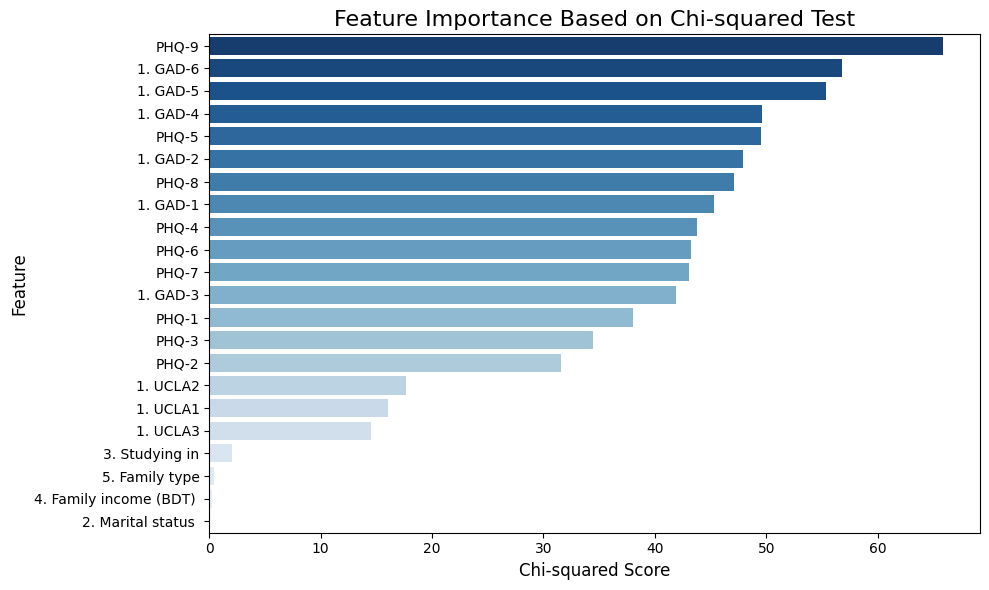

<ipython-input-15-53646b384513>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-test', y='Feature', data=feature_scores.sort_values(by='F-test', ascending=False), palette='Greens_r')


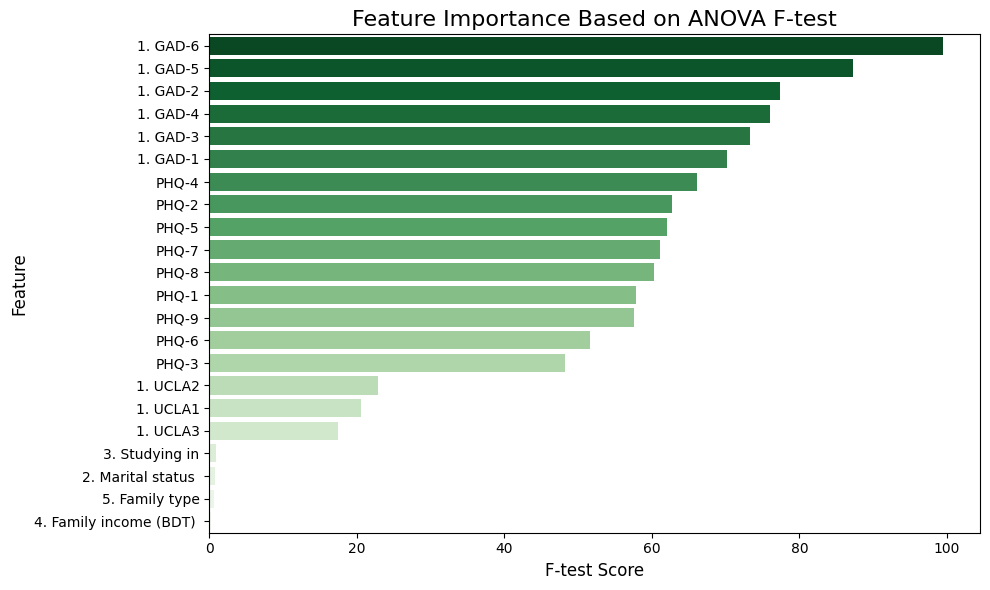

<ipython-input-15-53646b384513>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=feature_scores.sort_values(by='Mutual Information', ascending=False), palette='Oranges_r')


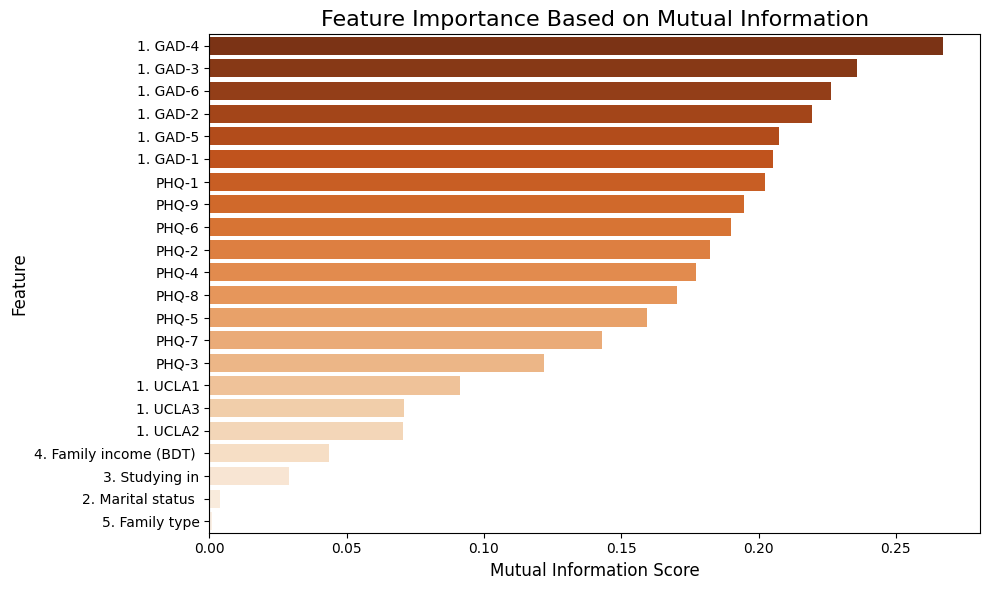

In [15]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Convert scores to DataFrame for easy visualization
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2': chi2_scores,
    'F-test': f_test_scores,
    'Mutual Information': mutual_info_scores
})

# Plot Chi-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi2', y='Feature', data=feature_scores.sort_values(by='Chi2', ascending=False), palette='Blues_r')
plt.title('Feature Importance Based on Chi-squared Test', fontsize=16)
plt.xlabel('Chi-squared Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot F-test scores
plt.figure(figsize=(10, 6))
sns.barplot(x='F-test', y='Feature', data=feature_scores.sort_values(by='F-test', ascending=False), palette='Greens_r')
plt.title('Feature Importance Based on ANOVA F-test', fontsize=16)
plt.xlabel('F-test Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot Mutual Information scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=feature_scores.sort_values(by='Mutual Information', ascending=False), palette='Oranges_r')
plt.title('Feature Importance Based on Mutual Information', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


Selected Features by RFE:
Index(['4. Family income (BDT) ', '1. GAD-4', '1. GAD-6', 'PHQ-4', 'PHQ-6'], dtype='object')

Validation Accuracy with Selected Features: 0.50
Test Accuracy with Selected Features: 0.59


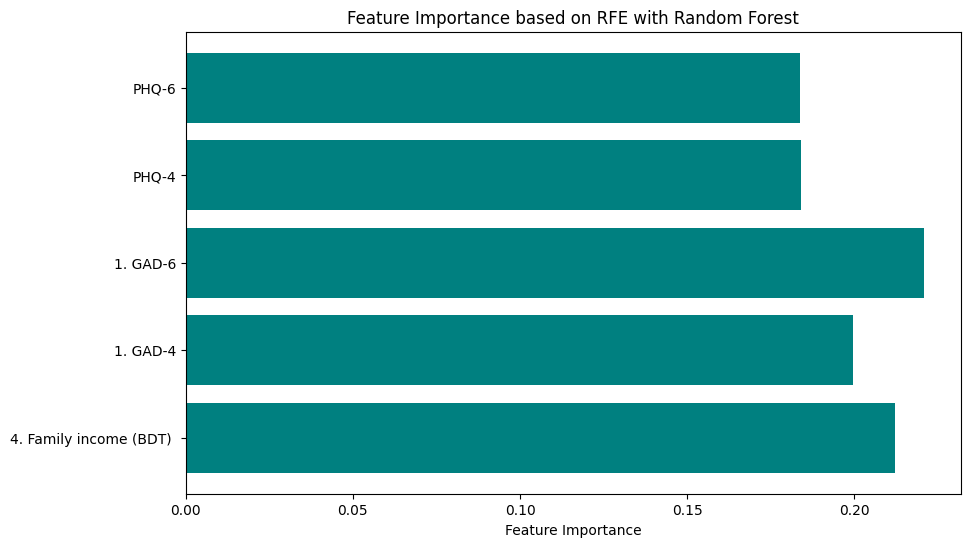

In [16]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get the ranking of features
ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]  # Features selected by RFE

print("Selected Features by RFE:")
print(selected_features)

# Evaluate the model with selected features
X_train_selected = rfe.transform(X_train)
X_val_selected = rfe.transform(X_val)
X_test_selected = rfe.transform(X_test)

rf_classifier.fit(X_train_selected, y_train)
y_val_pred = rf_classifier.predict(X_val_selected)
y_test_pred = rf_classifier.predict(X_test_selected)

# Calculate accuracy for validation and test sets
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nValidation Accuracy with Selected Features: {val_accuracy:.2f}")
print(f"Test Accuracy with Selected Features: {test_accuracy:.2f}")

# Plot feature importance (optional)
feature_importance = rfe.estimator_.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importance, color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance based on RFE with Random Forest')
plt.show()


<ipython-input-17-551e0238448f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


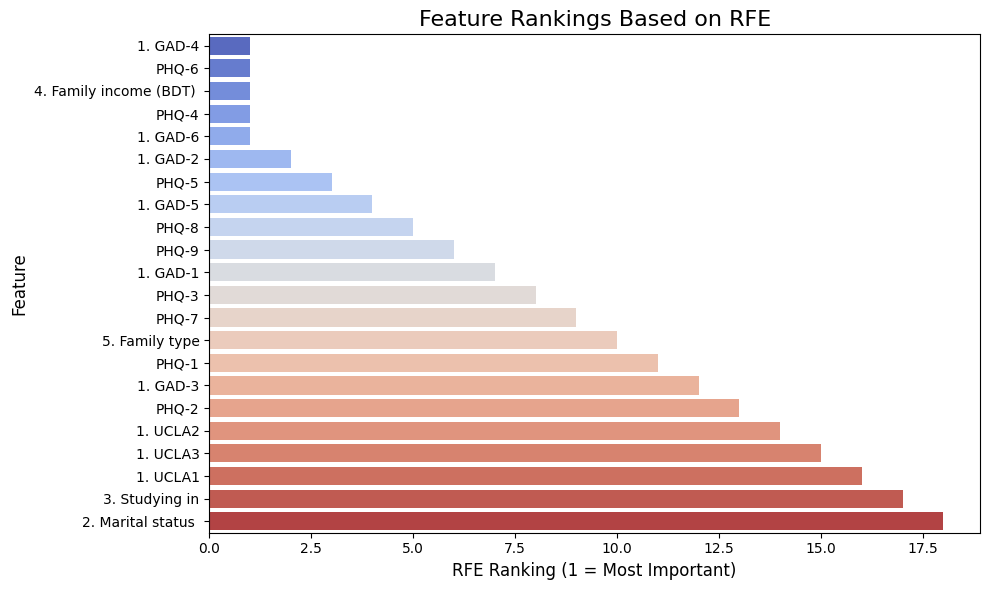

<ipython-input-17-551e0238448f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


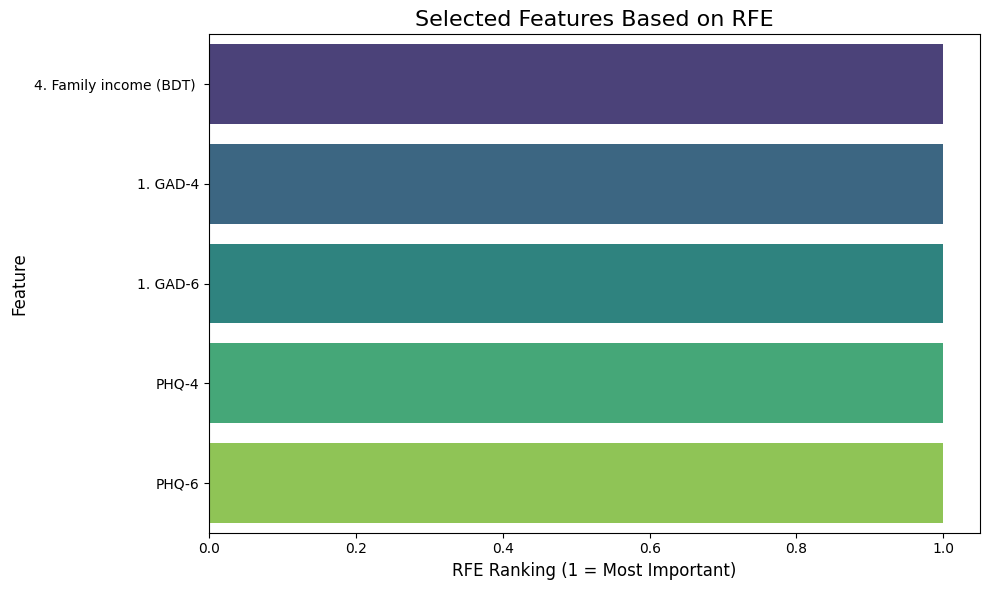

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined, and the dataset is pre-split into train/test/validation sets

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Adjust number of features to select
rfe.fit(X_train, y_train)

# Feature rankings
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
})

# Mark selected features
feature_scores['Selected'] = ['Yes' if rank == 1 else 'No' for rank in feature_scores['Ranking']]

# Filter only selected features
selected_features = feature_scores[feature_scores['Selected'] == 'Yes']

# Plot feature rankings (all features)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Ranking',
    y='Feature',
    data=feature_scores.sort_values(by='Ranking'),
    palette='coolwarm'
)
plt.title('Feature Rankings Based on RFE', fontsize=16)
plt.xlabel('RFE Ranking (1 = Most Important)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot only the selected features
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Ranking',
    y='Feature',
    data=selected_features.sort_values(by='Ranking'),
    palette='viridis'
)
plt.title('Selected Features Based on RFE', fontsize=16)
plt.xlabel('RFE Ranking (1 = Most Important)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-18-4b9ef61771ab>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='Oranges_r')


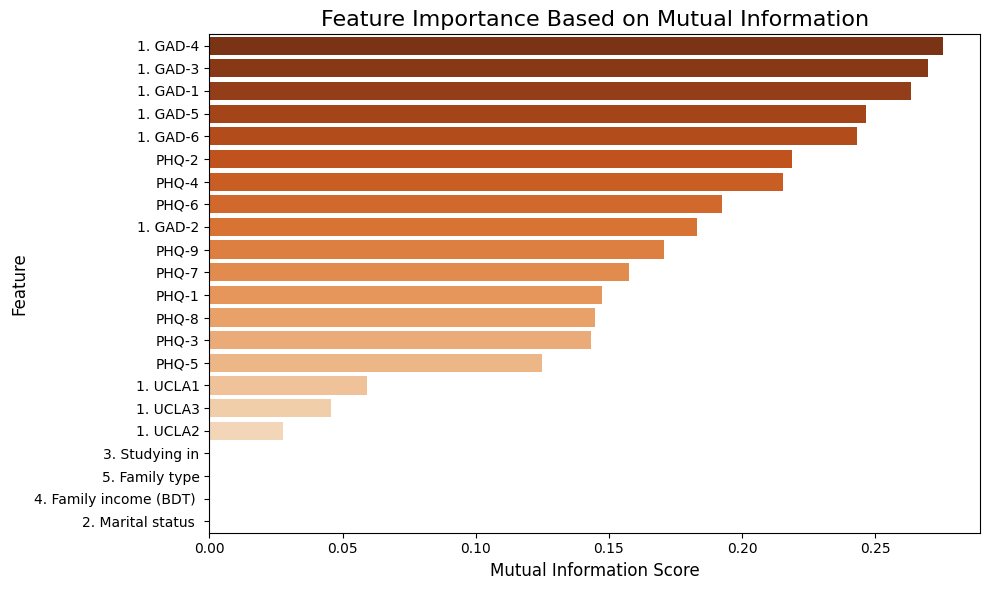

<ipython-input-18-4b9ef61771ab>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Normalized RFE Score', y='Feature', data=rfe_scores_df, palette='Blues_r')


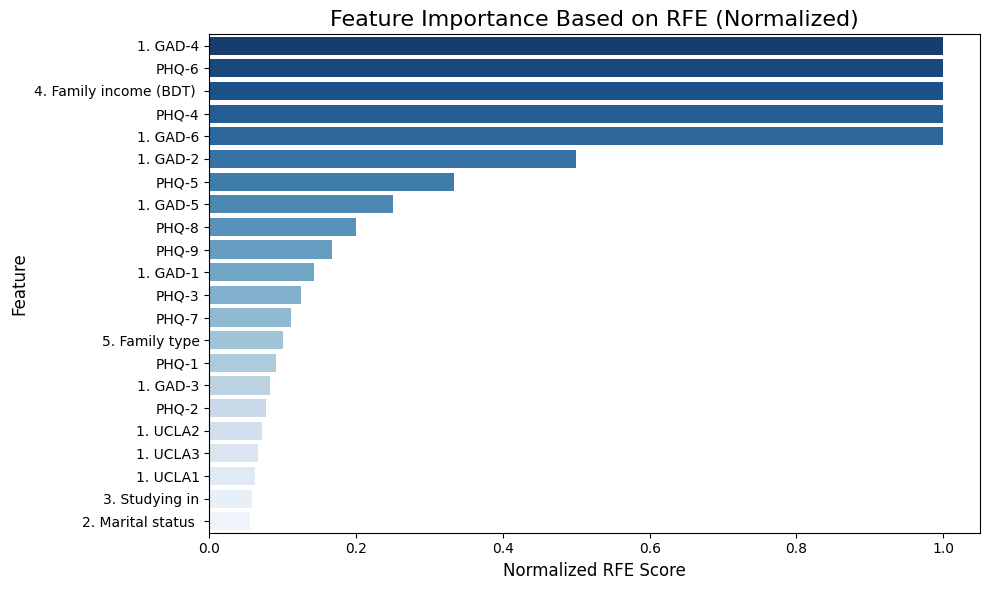

<ipython-input-18-4b9ef61771ab>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


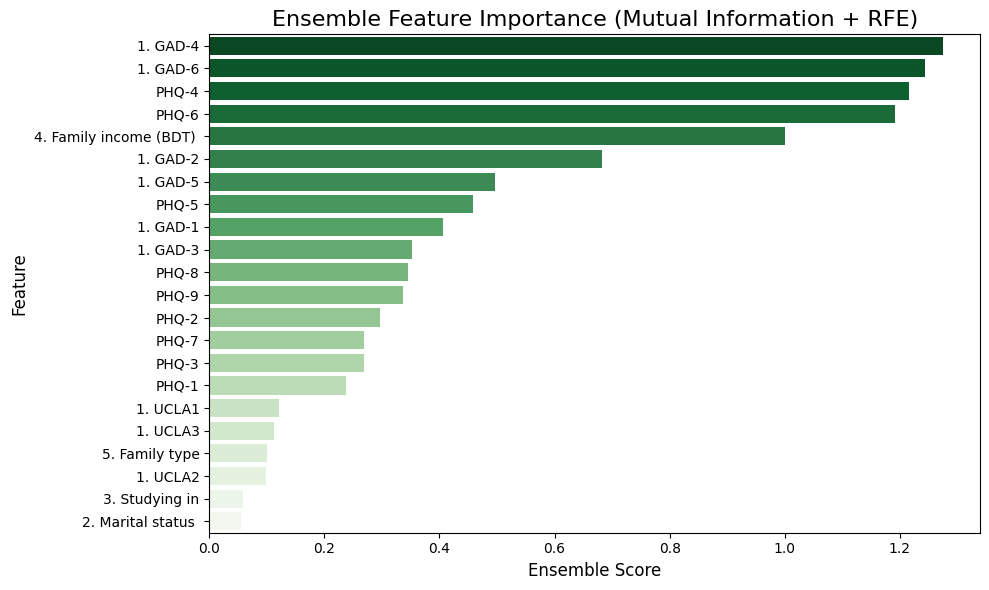

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are already defined and dataset is pre-split into train/test/validation sets

# 1. **Filter-Based Mutual Information**
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

# 2. **Wrapper-Based RFE**
rf_classifier = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf_classifier, n_features_to_select=5)  # Adjust number of features to select
rfe.fit(X_train, y_train)

# Create DataFrame for RFE scores
rfe_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'RFE Ranking': rfe.ranking_
}).sort_values(by='RFE Ranking')

# Normalize the RFE scores for comparability (lower is better, so invert the scale)
rfe_scores_df['Normalized RFE Score'] = 1 / rfe_scores_df['RFE Ranking']

# 3. **Combine Both Scores**
combined_scores_df = mi_scores_df.merge(rfe_scores_df, on='Feature')
combined_scores_df['Ensemble Score'] = (
    combined_scores_df['Mutual Information'] + combined_scores_df['Normalized RFE Score']
)

# Sort by Ensemble Score
combined_scores_df = combined_scores_df.sort_values(by='Ensemble Score', ascending=False)

# 4. **Visualization**

# Plot Mutual Information
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_scores_df, palette='Oranges_r')
plt.title('Feature Importance Based on Mutual Information', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot RFE Normalized Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Normalized RFE Score', y='Feature', data=rfe_scores_df, palette='Blues_r')
plt.title('Feature Importance Based on RFE (Normalized)', fontsize=16)
plt.xlabel('Normalized RFE Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Plot Combined Ensemble Scores
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Ensemble Score',
    y='Feature',
    data=combined_scores_df,
    palette='Greens_r'
)
plt.title('Ensemble Feature Importance (Mutual Information + RFE)', fontsize=16)
plt.xlabel('Ensemble Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/depression/stu_fem4.xlsx')
data.head()

,4. Family income (BDT),1. UCLA1,1. GAD-1,1. GAD-2,1. GAD-3,1. GAD-4,1. GAD-5,1. GAD-6,1. GAD-7,PHQ-1,PHQ-2,PHQ-3,PHQ-4,PHQ-5,PHQ-6,PHQ-7,PHQ-8,PHQ-9
0,0,1,0,1,3,0,2,0,0,0,3,3,0,3,3,0,0,0
1,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,3,1,0,1,3,0,0,1,2,1,0,0,0,1,0
4,0,2,2,2,2,1,0,0,0,1,2,1,2,1,0,2,2,0


In [28]:
# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('1. GAD-7', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['1. GAD-7']

# Print the feature matrix X and target variable y
print(X)
print(y)

     4. Family income (BDT)   1. UCLA1  1. GAD-1  1. GAD-2  1. GAD-3  \
0                          0         1         0         1         3   
1                          0         3         3         3         3   
2                          0         1         0         0         0   
3                          0         1         1         3         1   
4                          0         2         2         2         2   
..                       ...       ...       ...       ...       ...   
446                        5         2         3         3         3   
447                        5         2         1         1         1   
448                        5         2         3         0         3   
449                        5         2         1         3         1   
450                        5         3         1         1         1   

     1. GAD-4  1. GAD-5  1. GAD-7  PHQ-1  PHQ-2  PHQ-3  PHQ-4  PHQ-5  PHQ-6  \
0           0         2         0      0      3      3  

In [29]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Accuracy: 0.967032967032967
Weighted Precision: 0.9663508904888215
Micro Precision: 0.967032967032967
Macro Precision: 0.9327586206896552
Precision per class: [1.         0.93103448 0.8        1.        ]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.96        27
           2       0.80      0.67      0.73         6
           3       1.00      0.95      0.98        21

    accuracy                           0.97        91
   macro avg       0.93      0.90      0.92        91
weighted avg       0.97      0.97      0.97        91



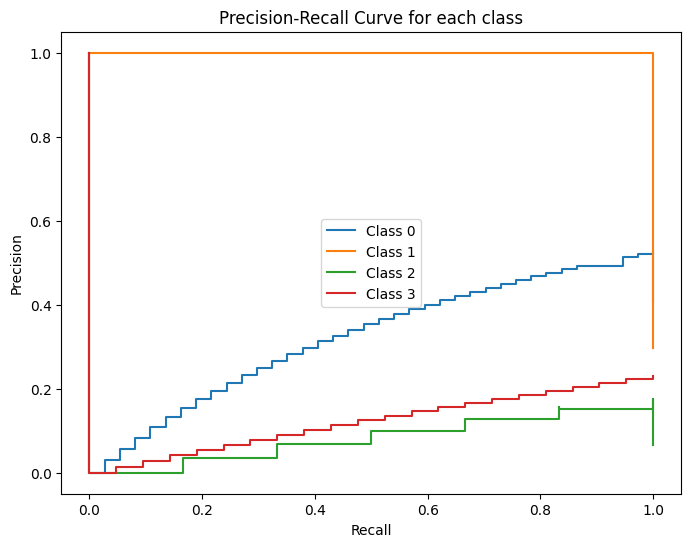

<ipython-input-30-63a0b8c94a33>:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-30-63a0b8c94a33>:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-30-63a0b8c94a33>:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


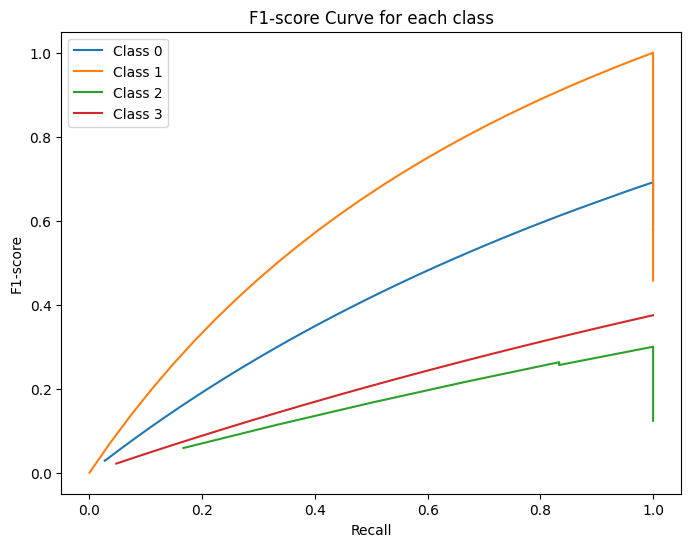

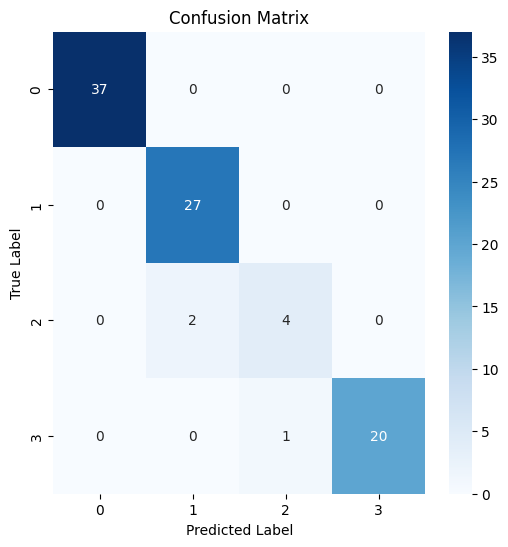

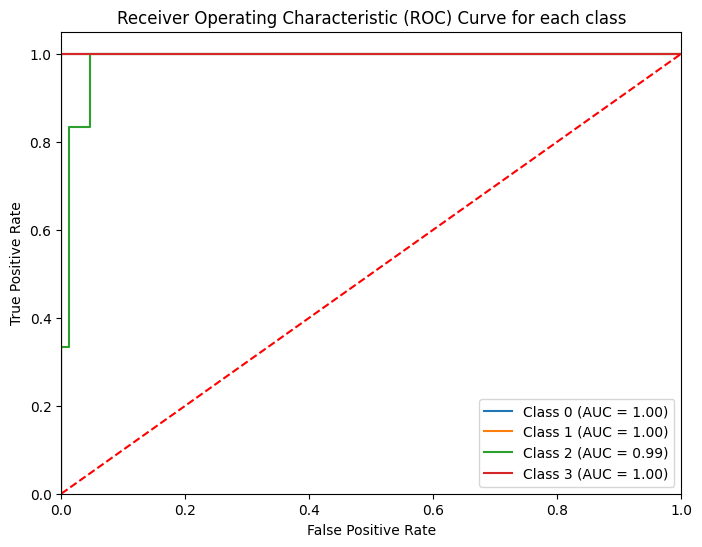

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Train the model
logistic_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_pred_probs = logistic_classifier.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs  # Use the calculated y_pred_probs
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs)
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = logistic_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your classes are encoded as integers starting from 0
classes = np.unique(y_test)

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


In [23]:
!pip install deap

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [2.6, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'lbfgs', 'newton-cg', 'sag', 'saga', 'newton-cholesky', 'liblinear'}. Got 'False' instead.
Error with individual [8.4, 'False']: The 'solver' parameter of LogisticRegression must be a str among {'lbfgs', 'newton-cg', 'sag', 'saga', 'newton-cholesky', 'liblinear'}. Got 'False' instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'newton-cg']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [0.0, 'False']: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0.0 instead.
Error with individual [8.4, 'False']: The 'solver' parameter o

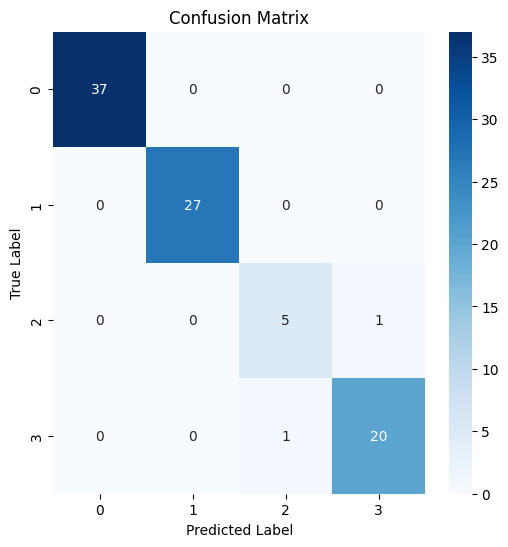

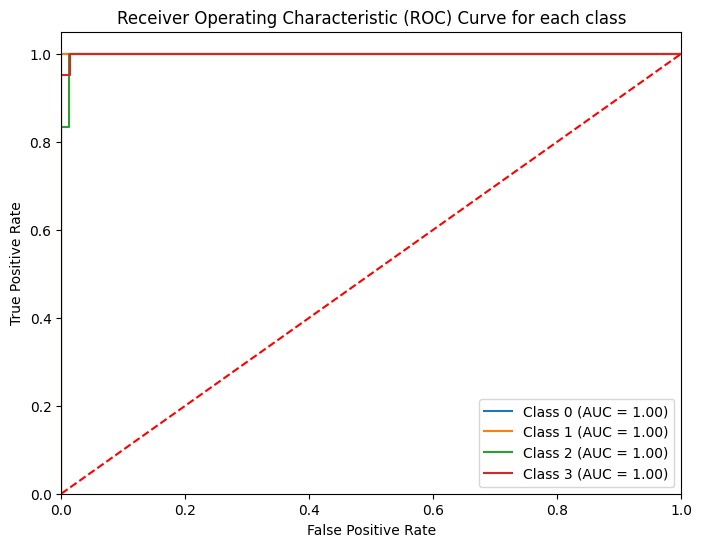

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from deap import base, creator, tools, algorithms

# Define the ranges for hyperparameters
C_range = np.linspace(0.1, 10.0, 100)  # Increased range and resolution
solvers = ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']

# Split the data into training and test sets
# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define evaluation function
def evaluate_individual(individual):
    C = individual[0]
    solver = individual[1]

    try:
        # Define the model with the given hyperparameters
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)

        # Fit the model and evaluate on the validation set
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_val_pred)
        return accuracy,
    except Exception as e:
        print(f"Error with individual {individual}: {e}")
        return 0.0,

# Create individual and population classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Register genetic algorithm components
toolbox = base.Toolbox()
toolbox.register("attr_C", np.random.choice, C_range)
toolbox.register("attr_solver", np.random.choice, solvers)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_C, toolbox.attr_solver), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
population = toolbox.population(n=100)  # Increased population size

# Apply the genetic algorithm
NGEN = 20  # Increased generations
CXPB = 0.7  # Increased crossover probability
MUTPB = 0.3  # Increased mutation probability

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    fits = map(toolbox.evaluate, offspring)

    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

# Select the best individual
best_individual = tools.selBest(population, k=1)[0]
best_C, best_solver = best_individual

# Train and evaluate the final model
final_model = LogisticRegression(C=best_C, solver=best_solver, max_iter=1000)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Best C:", best_C)
print("Best Solver:", best_solver)
print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = final_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = np.unique(y_test)

for class_label in classes:
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, class_label]

    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9560439560439561
Weighted Precision: 0.9571428571428571
Micro Precision: 0.9560439560439561
Macro Precision: 0.925
Precision per class: [1.  0.9 0.8 1. ]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.90      1.00      0.95        27
           2       0.80      0.67      0.73         6
           3       1.00      0.90      0.95        21

    accuracy                           0.96        91
   macro avg       0.93      0.89      0.91        91
weighted avg       0.96      0.96      0.95        91



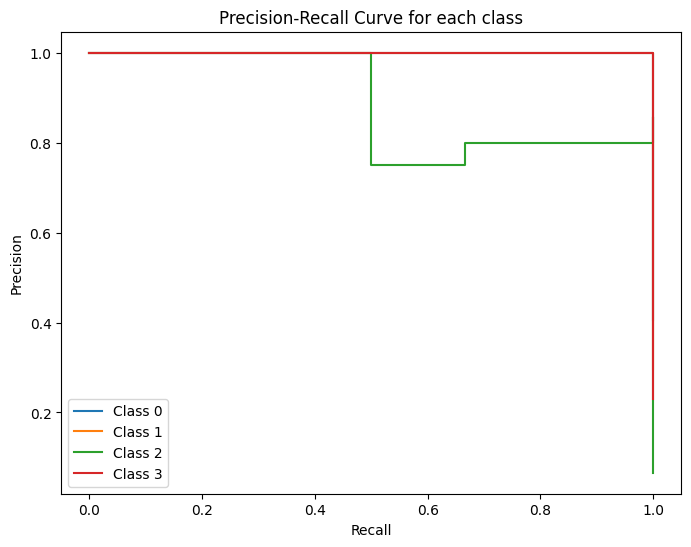

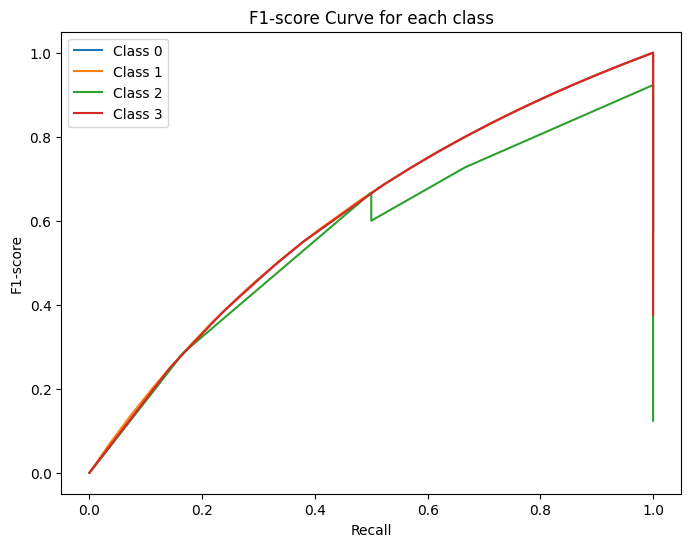

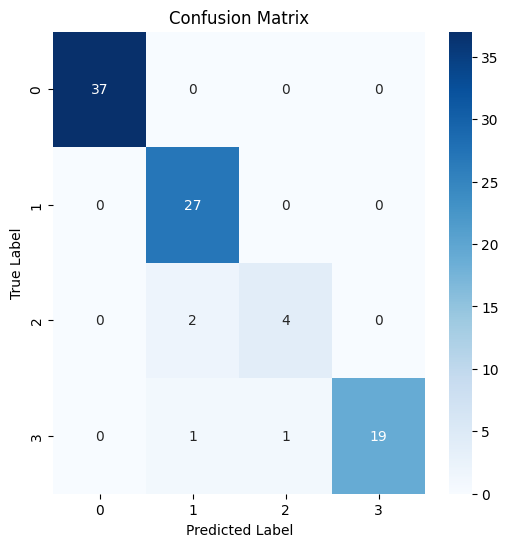

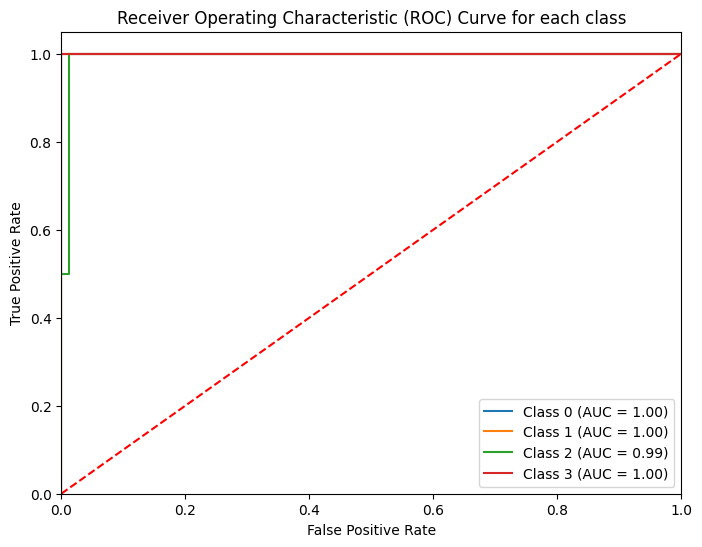

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = random_forest_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate predicted probabilities for ROC and Precision-Recall curves
y_pred_probs = random_forest_classifier.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs[:, i]
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


In [38]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/depression/stu_fem2.xlsx')
data.head()

,1. UCLA1,1. UCLA3,1. GAD-1,1. GAD-2,1. GAD-3,1. GAD-4,1. GAD-5,1. GAD-6,1. GAD-7,PHQ-1,PHQ-2,PHQ-3,PHQ-4,PHQ-5,PHQ-6,PHQ-7,PHQ-8,PHQ-9
0,1,2,0,1,3,0,2,0,0,0,3,3,0,3,3,0,0,0
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,3,1,0,1,3,0,0,1,2,1,0,0,0,1,0
4,2,2,2,2,2,1,0,0,0,1,2,1,2,1,0,2,2,0


In [39]:
# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('1. GAD-7', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['1. GAD-7']

# Print the feature matrix X and target variable y
print(X)
print(y)

     1. UCLA1  1. UCLA3  1. GAD-1  1. GAD-2  1. GAD-3  1. GAD-4  1. GAD-5  \
0           1         2         0         1         3         0         2   
1           3         3         3         3         3         3         3   
2           1         1         0         0         0         0         0   
3           1         1         1         3         1         0         1   
4           2         2         2         2         2         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
446         2         3         3         3         3         3         3   
447         2         2         1         1         1         0         0   
448         2         2         3         0         3         3         3   
449         2         1         1         3         1         1         1   
450         3         2         1         1         1         1         1   

     1. GAD-7  PHQ-1  PHQ-2  PHQ-3  PHQ-4  PHQ-5  PHQ-6  PHQ-7  PHQ-8  PHQ-

In [40]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Accuracy: 0.945054945054945
Weighted Precision: 0.9421232125406355
Micro Precision: 0.945054945054945
Macro Precision: 0.9050589836660617
Precision per class: [0.97368421 0.89655172 0.75       1.        ]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.90      0.96      0.93        27
           2       0.75      0.50      0.60         6
           3       1.00      0.95      0.98        21

    accuracy                           0.95        91
   macro avg       0.91      0.85      0.87        91
weighted avg       0.94      0.95      0.94        91



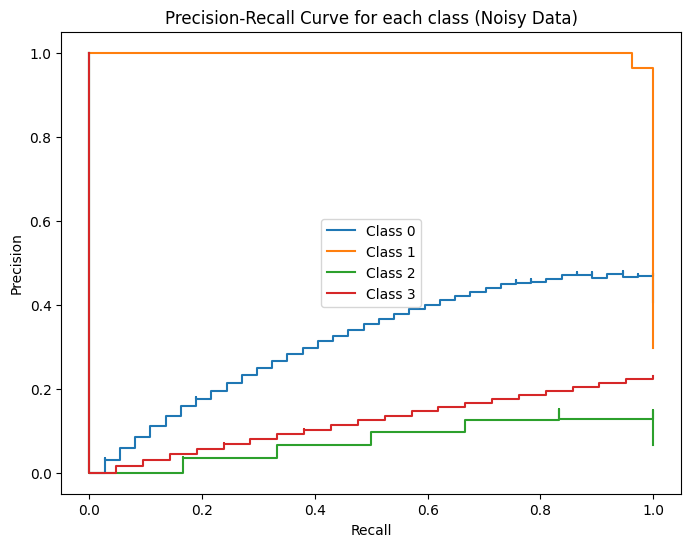

<ipython-input-53-09f27f5bfc0d>:64: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-53-09f27f5bfc0d>:64: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-53-09f27f5bfc0d>:64: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


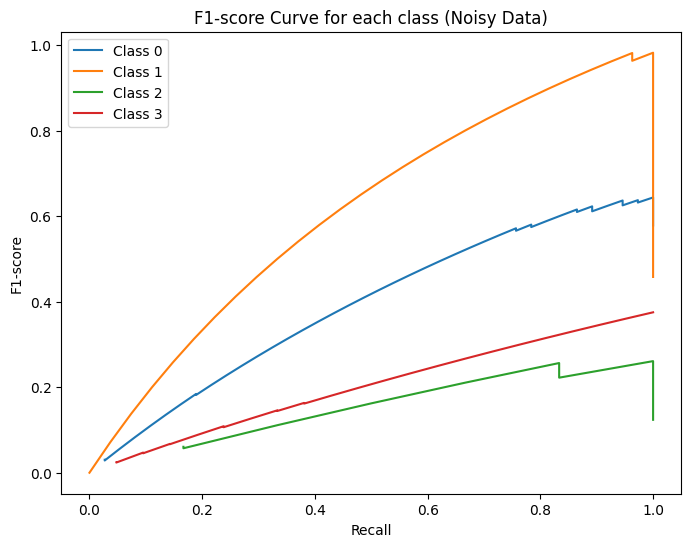

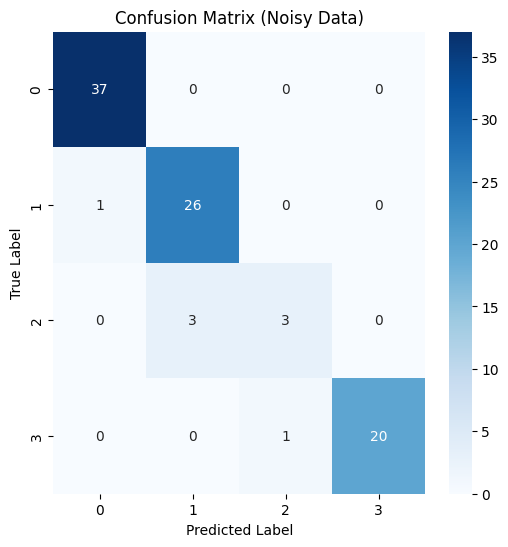

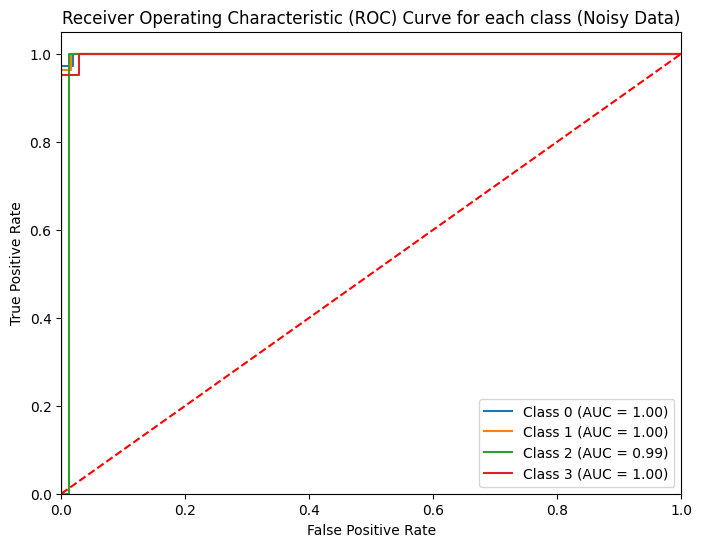

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize the logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Train the model on noisy data
logistic_classifier.fit(X_train, y_train)

# Model testing and evaluation on noisy data
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_pred_probs = logistic_classifier.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs  # Use the calculated y_pred_probs
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class (Noisy Data)')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs)
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class (Noisy Data)')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Noisy Data)')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = logistic_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your classes are encoded as integers starting from 0
classes = np.unique(y_test)

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class (Noisy Data)')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Accuracy: 0.967032967032967
Weighted Precision: 0.9663508904888215
Micro Precision: 0.967032967032967
Macro Precision: 0.9327586206896552
Precision per class: [1.         0.93103448 0.8        1.        ]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.96        27
           2       0.80      0.67      0.73         6
           3       1.00      0.95      0.98        21

    accuracy                           0.97        91
   macro avg       0.93      0.90      0.92        91
weighted avg       0.97      0.97      0.97        91



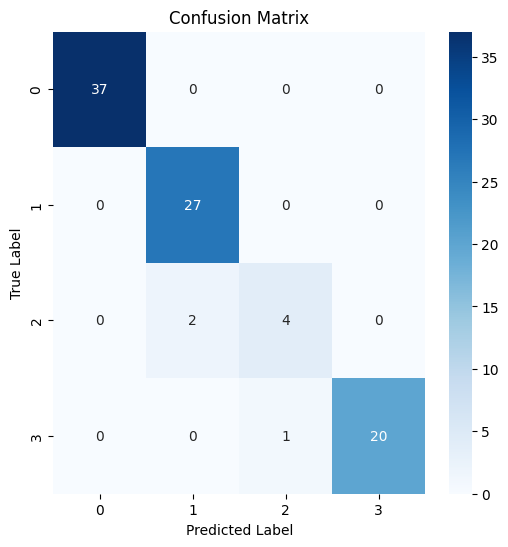

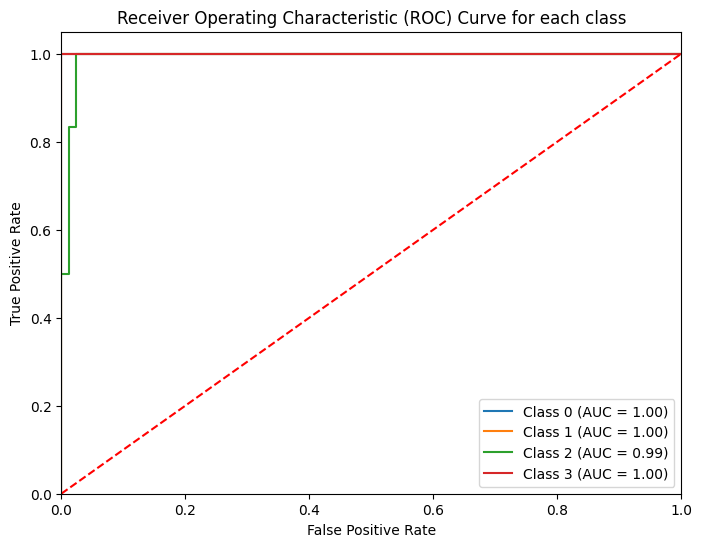

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from deap import base, creator, tools, algorithms

# Fixed C and solver
C_fixed = 1.0
solver_fixed = 'newton-cg'

# Define evaluation function with added noise
def evaluate_individual(individual):
    # We now use the fixed values for C and solver
    C = C_fixed
    solver = solver_fixed

    try:
        # Define the model with the given hyperparameters
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)

        # Fit the model and evaluate on the validation set
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)


        accuracy = accuracy_score(y_val, y_val_pred)


        # Ensure accuracy is not negative and remains in the valid range [0, 1]
        accuracy = max(0, accuracy)

        return accuracy,
    except Exception as e:
        print(f"Error with individual {individual}: {e}")
        return 0.0,

# Create individual and population classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Register genetic algorithm components
toolbox = base.Toolbox()
toolbox.register("attr_C", lambda: C_fixed)  # Fixed C value
toolbox.register("attr_solver", lambda: solver_fixed)  # Fixed solver value
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_C, toolbox.attr_solver), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
population = toolbox.population(n=100)  # Increased population size

# Apply the genetic algorithm
NGEN = 10  # Increased generations
CXPB = 0.7  # Increased crossover probability
MUTPB = 0.3  # Increased mutation probability

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    fits = map(toolbox.evaluate, offspring)

    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

# Select the best individual
best_individual = tools.selBest(population, k=1)[0]

# Train and evaluate the final model
final_model = LogisticRegression(C=C_fixed, solver=solver_fixed, max_iter=1000)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = final_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = np.unique(y_test)

for class_label in classes:
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, class_label]

    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9560439560439561
Weighted Precision: 0.9571428571428571
Micro Precision: 0.9560439560439561
Macro Precision: 0.925
Precision per class: [1.  0.9 0.8 1. ]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.90      1.00      0.95        27
           2       0.80      0.67      0.73         6
           3       1.00      0.90      0.95        21

    accuracy                           0.96        91
   macro avg       0.93      0.89      0.91        91
weighted avg       0.96      0.96      0.95        91



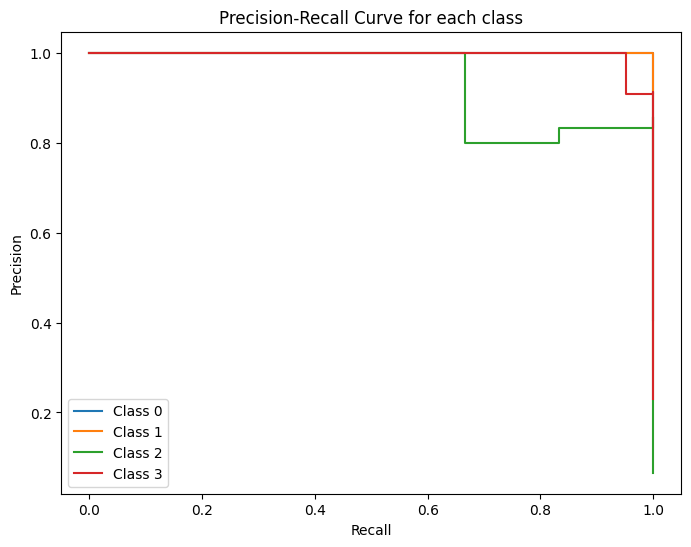

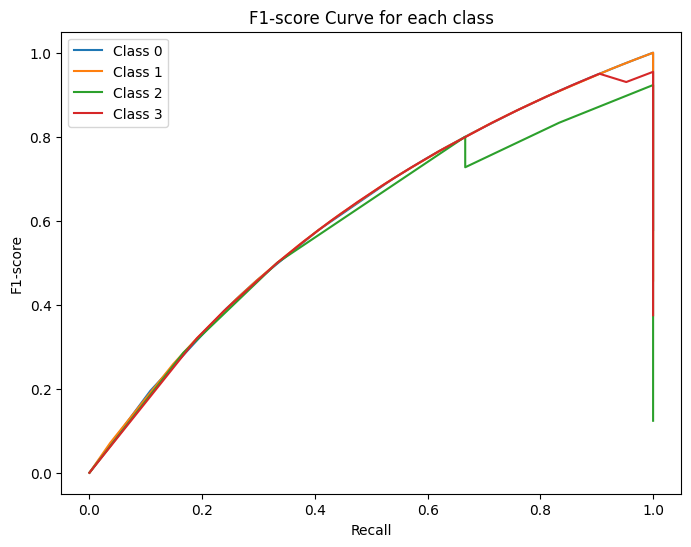

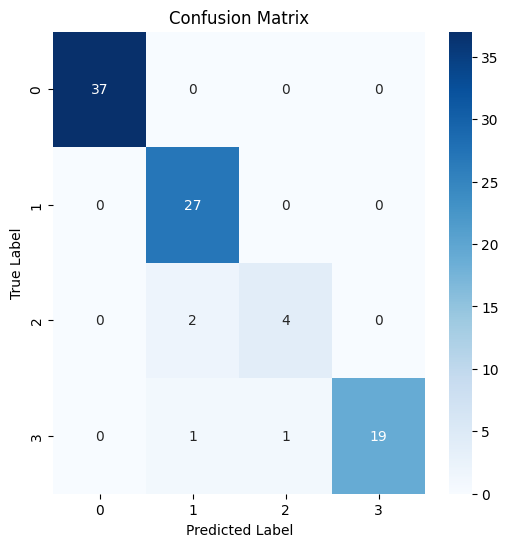

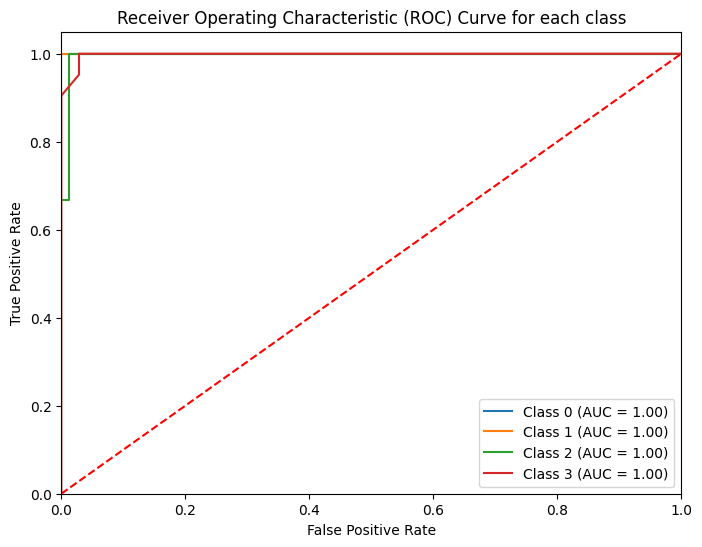

In [56]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = random_forest_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate predicted probabilities for ROC and Precision-Recall curves
y_pred_probs = random_forest_classifier.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs[:, i]
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


In [57]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/depression/stu_fem3.xlsx')
data.head()

,4. Family income (BDT),5. Family type,1. GAD-1,1. GAD-2,1. GAD-3,1. GAD-4,1. GAD-5,1. GAD-6,1. GAD-7,PHQ-1,PHQ-2,PHQ-3,PHQ-4,PHQ-5,PHQ-6,PHQ-7,PHQ-8,PHQ-9
0,0,0,0,1,3,0,2,0,0,0,3,3,0,3,3,0,0,0
1,0,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,3,1,0,1,3,0,0,1,2,1,0,0,0,1,0
4,0,1,2,2,2,1,0,0,0,1,2,1,2,1,0,2,2,0


In [58]:
# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('1. GAD-7', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['1. GAD-7']

# Print the feature matrix X and target variable y
print(X)
print(y)

     4. Family income (BDT)   5. Family type  1. GAD-1  1. GAD-2  1. GAD-3  \
0                          0               0         0         1         3   
1                          0               1         3         3         3   
2                          0               0         0         0         0   
3                          0               1         1         3         1   
4                          0               1         2         2         2   
..                       ...             ...       ...       ...       ...   
446                        5               2         3         3         3   
447                        5               0         1         1         1   
448                        5               0         3         0         3   
449                        5               2         1         3         1   
450                        5               2         1         1         1   

     1. GAD-4  1. GAD-5  1. GAD-7  PHQ-1  PHQ-2  PHQ-3  PHQ-4  

In [59]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Accuracy: 0.9560439560439561
Weighted Precision: 0.9538461538461538
Micro Precision: 0.9560439560439561
Macro Precision: 0.9125
Precision per class: [1.   0.9  0.75 1.  ]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.90      1.00      0.95        27
           2       0.75      0.50      0.60         6
           3       1.00      0.95      0.98        21

    accuracy                           0.96        91
   macro avg       0.91      0.86      0.88        91
weighted avg       0.95      0.96      0.95        91



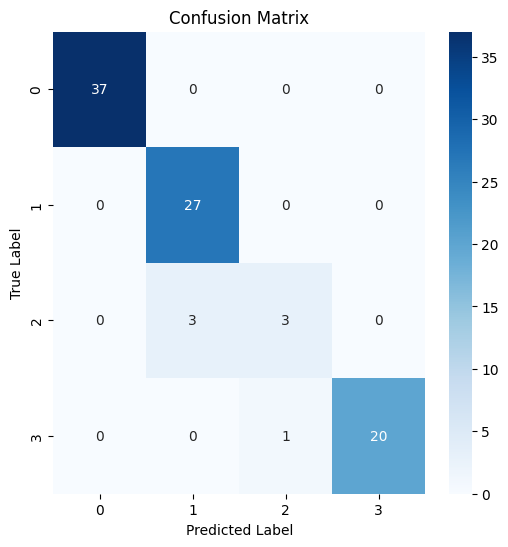

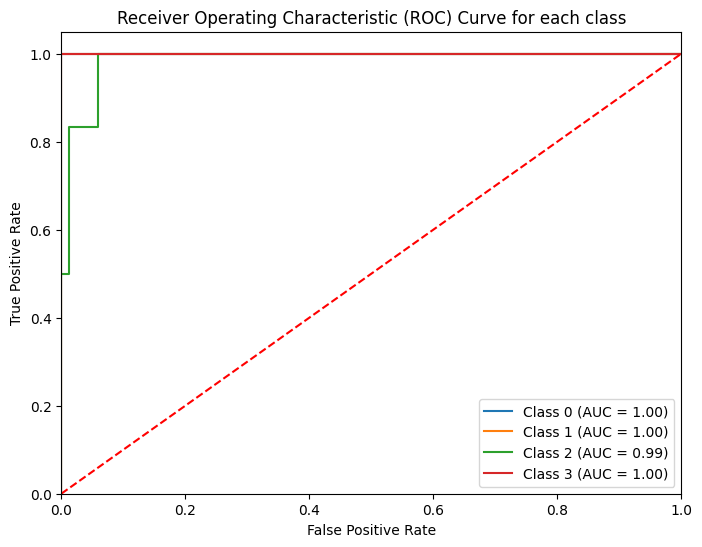

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from deap import base, creator, tools, algorithms

# Fixed C and solver
C_fixed = 1.0
solver_fixed = 'newton-cg'

# Define evaluation function with added noise
def evaluate_individual(individual):
    # We now use the fixed values for C and solver
    C = C_fixed
    solver = solver_fixed

    try:
        # Define the model with the given hyperparameters
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)

        # Fit the model and evaluate on the validation set
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)


        accuracy = accuracy_score(y_val, y_val_pred)


        # Ensure accuracy is not negative and remains in the valid range [0, 1]
        accuracy = max(0, accuracy)

        return accuracy,
    except Exception as e:
        print(f"Error with individual {individual}: {e}")
        return 0.0,

# Create individual and population classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Register genetic algorithm components
toolbox = base.Toolbox()
toolbox.register("attr_C", lambda: C_fixed)  # Fixed C value
toolbox.register("attr_solver", lambda: solver_fixed)  # Fixed solver value
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_C, toolbox.attr_solver), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
population = toolbox.population(n=100)  # Increased population size

# Apply the genetic algorithm
NGEN = 10  # Increased generations
CXPB = 0.7  # Increased crossover probability
MUTPB = 0.3  # Increased mutation probability

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    fits = map(toolbox.evaluate, offspring)

    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

# Select the best individual
best_individual = tools.selBest(population, k=1)[0]

# Train and evaluate the final model
final_model = LogisticRegression(C=C_fixed, solver=solver_fixed, max_iter=1000)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = final_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = np.unique(y_test)

for class_label in classes:
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, class_label]

    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9560439560439561
Weighted Precision: 0.9538461538461538
Micro Precision: 0.9560439560439561
Macro Precision: 0.9125
Precision per class: [1.   0.9  0.75 1.  ]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.90      1.00      0.95        27
           2       0.75      0.50      0.60         6
           3       1.00      0.95      0.98        21

    accuracy                           0.96        91
   macro avg       0.91      0.86      0.88        91
weighted avg       0.95      0.96      0.95        91



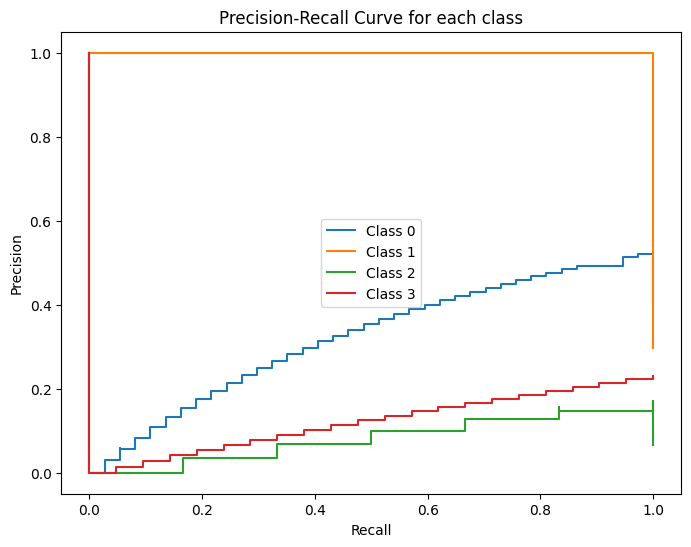

<ipython-input-60-63a0b8c94a33>:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-60-63a0b8c94a33>:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-60-63a0b8c94a33>:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


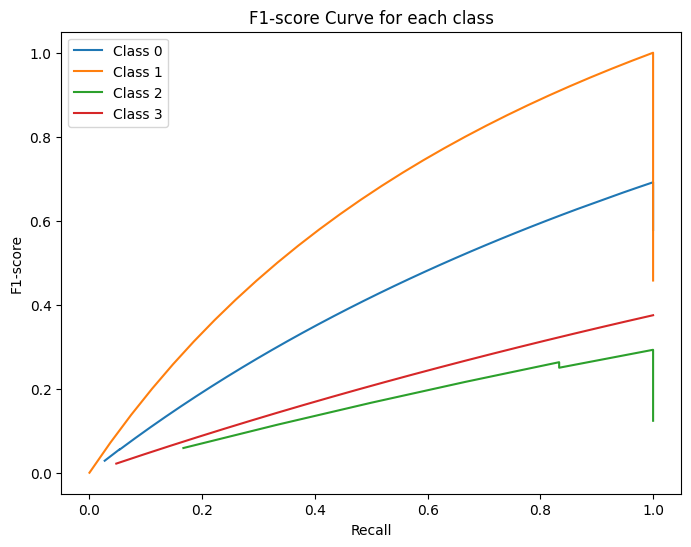

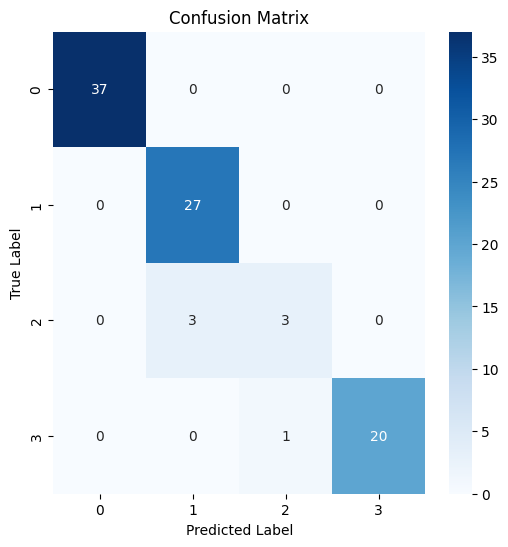

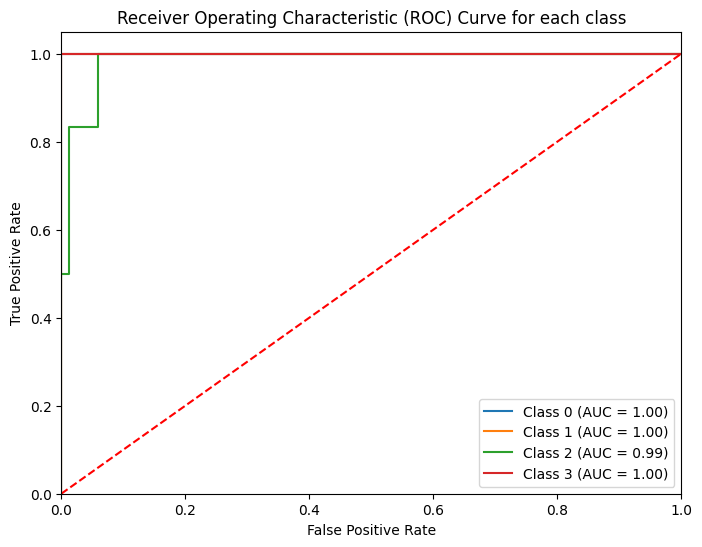

In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Train the model
logistic_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_pred_probs = logistic_classifier.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs  # Use the calculated y_pred_probs
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs)
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = logistic_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your classes are encoded as integers starting from 0
classes = np.unique(y_test)

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9560439560439561
Weighted Precision: 0.9571428571428571
Micro Precision: 0.9560439560439561
Macro Precision: 0.925
Precision per class: [1.  0.9 0.8 1. ]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.90      1.00      0.95        27
           2       0.80      0.67      0.73         6
           3       1.00      0.90      0.95        21

    accuracy                           0.96        91
   macro avg       0.93      0.89      0.91        91
weighted avg       0.96      0.96      0.95        91



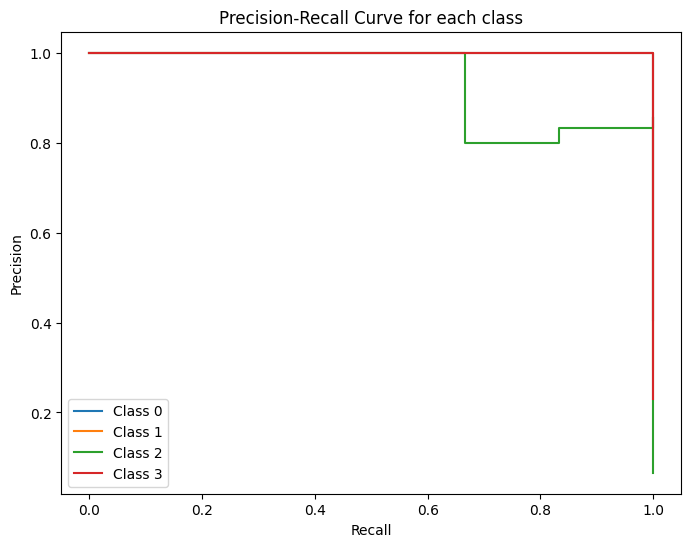

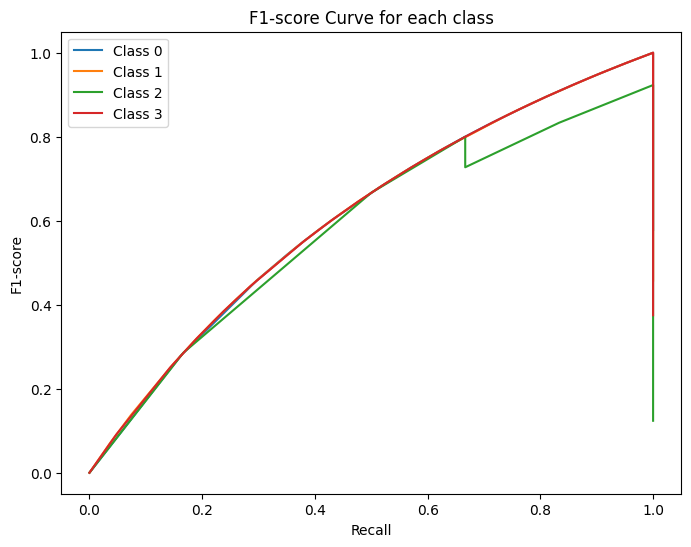

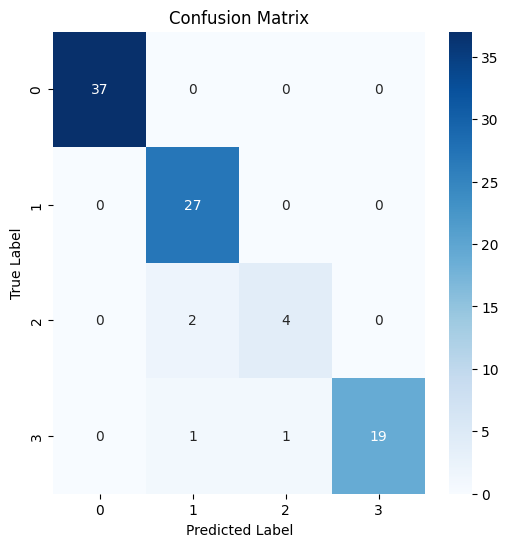

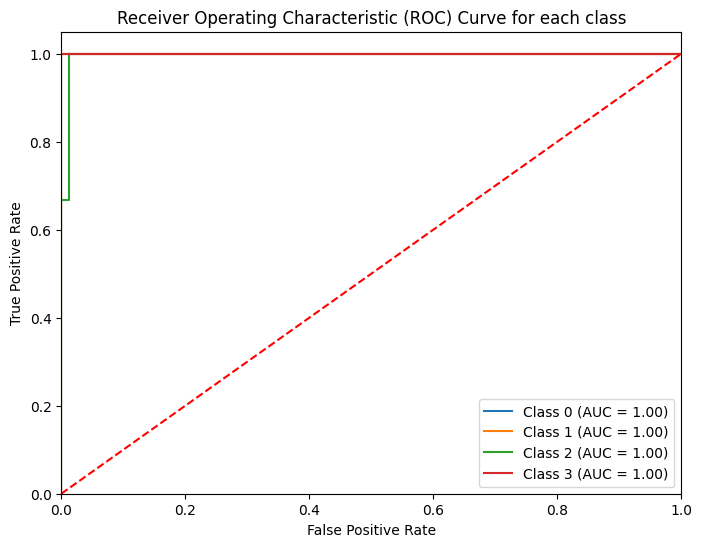

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = random_forest_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate predicted probabilities for ROC and Precision-Recall curves
y_pred_probs = random_forest_classifier.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs[:, i]
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


In [63]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/depression/stu_fem1.xlsx')
data.head()

,2. Marital status,3. Studying in,4. Family income (BDT),5. Family type,1. UCLA1,1. UCLA2,1. UCLA3,1. GAD-1,1. GAD-2,1. GAD-3,...,1. GAD-7,PHQ-1,PHQ-2,PHQ-3,PHQ-4,PHQ-5,PHQ-6,PHQ-7,PHQ-8,PHQ-9
0,2,0,0,0,1,1,2,0,1,3,...,0,0,3,3,0,3,3,0,0,0
1,2,0,0,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,2,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,2,1,1,3,1,...,0,0,1,2,1,0,0,0,1,0
4,2,1,0,1,2,1,2,2,2,2,...,0,1,2,1,2,1,0,2,2,0


In [64]:
# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('1. GAD-7', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['1. GAD-7']

# Print the feature matrix X and target variable y
print(X)
print(y)

     2. Marital status   3. Studying in  4. Family income (BDT)   \
0                     2               0                        0   
1                     2               0                        0   
2                     2               0                        0   
3                     1               0                        0   
4                     2               1                        0   
..                  ...             ...                      ...   
446                   2               0                        5   
447                   2               1                        5   
448                   2               0                        5   
449                   2               0                        5   
450                   2               0                        5   

     5. Family type  1. UCLA1  1. UCLA2  1. UCLA3  1. GAD-1  1. GAD-2  \
0                 0         1         1         2         0         1   
1                 1         3        

In [65]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Accuracy: 0.9560439560439561
Weighted Precision: 0.9538461538461538
Micro Precision: 0.9560439560439561
Macro Precision: 0.9125
Precision per class: [1.   0.9  0.75 1.  ]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.90      1.00      0.95        27
           2       0.75      0.50      0.60         6
           3       1.00      0.95      0.98        21

    accuracy                           0.96        91
   macro avg       0.91      0.86      0.88        91
weighted avg       0.95      0.96      0.95        91



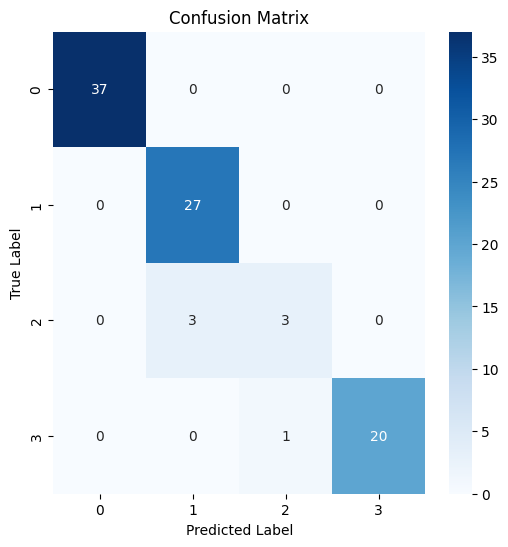

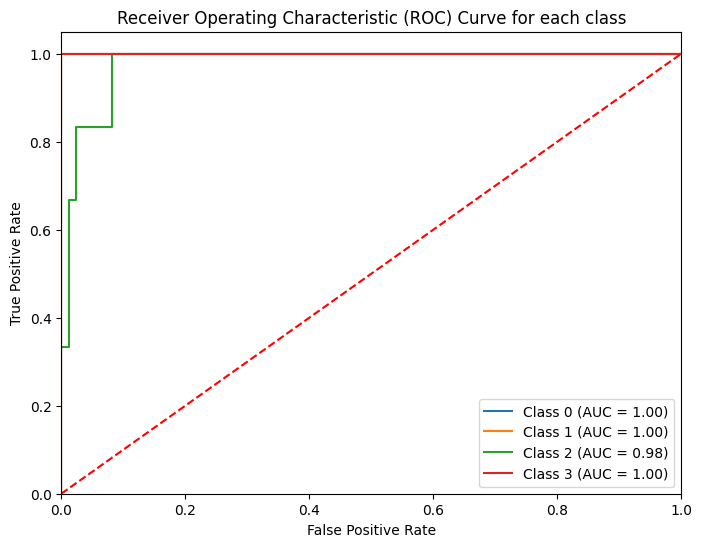

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from deap import base, creator, tools, algorithms

# Fixed C and solver
C_fixed = 1.0
solver_fixed = 'newton-cg'

# Define evaluation function with added noise
def evaluate_individual(individual):
    # We now use the fixed values for C and solver
    C = C_fixed
    solver = solver_fixed

    try:
        # Define the model with the given hyperparameters
        model = LogisticRegression(C=C, solver=solver, max_iter=1000)

        # Fit the model and evaluate on the validation set
        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)


        accuracy = accuracy_score(y_val, y_val_pred)


        # Ensure accuracy is not negative and remains in the valid range [0, 1]
        accuracy = max(0, accuracy)

        return accuracy,
    except Exception as e:
        print(f"Error with individual {individual}: {e}")
        return 0.0,

# Create individual and population classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Register genetic algorithm components
toolbox = base.Toolbox()
toolbox.register("attr_C", lambda: C_fixed)  # Fixed C value
toolbox.register("attr_solver", lambda: solver_fixed)  # Fixed solver value
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_C, toolbox.attr_solver), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create the population
population = toolbox.population(n=100)  # Increased population size

# Apply the genetic algorithm
NGEN = 10  # Increased generations
CXPB = 0.7  # Increased crossover probability
MUTPB = 0.3  # Increased mutation probability

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    fits = map(toolbox.evaluate, offspring)

    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

# Select the best individual
best_individual = tools.selBest(population, k=1)[0]

# Train and evaluate the final model
final_model = LogisticRegression(C=C_fixed, solver=solver_fixed, max_iter=1000)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = final_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
classes = np.unique(y_test)

for class_label in classes:
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, class_label]

    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.945054945054945
Weighted Precision: 0.9365806607185918
Micro Precision: 0.945054945054945
Macro Precision: 0.8766980146290491
Precision per class: [1.         0.93103448 0.66666667 0.90909091]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.96        27
           2       0.67      0.33      0.44         6
           3       0.91      0.95      0.93        21

    accuracy                           0.95        91
   macro avg       0.88      0.82      0.83        91
weighted avg       0.94      0.95      0.94        91



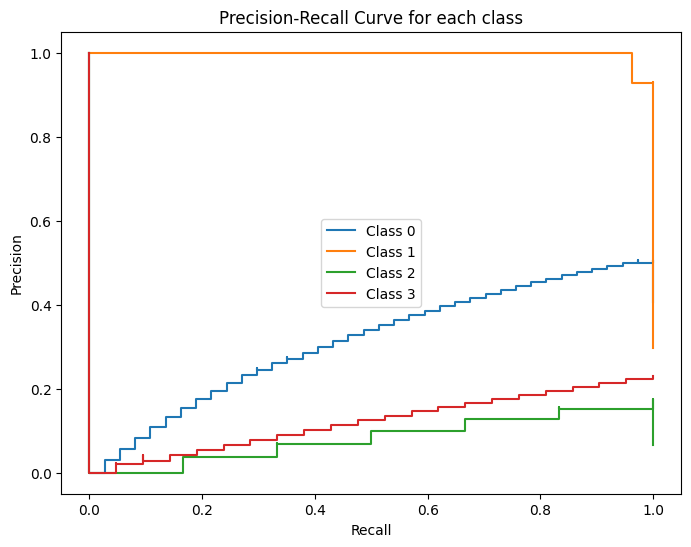

<ipython-input-70-e70059696719>:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-70-e70059696719>:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)
<ipython-input-70-e70059696719>:61: RuntimeWarning: invalid value encountered in divide
  f1_values = 2 * (precision * recall) / (precision + recall)


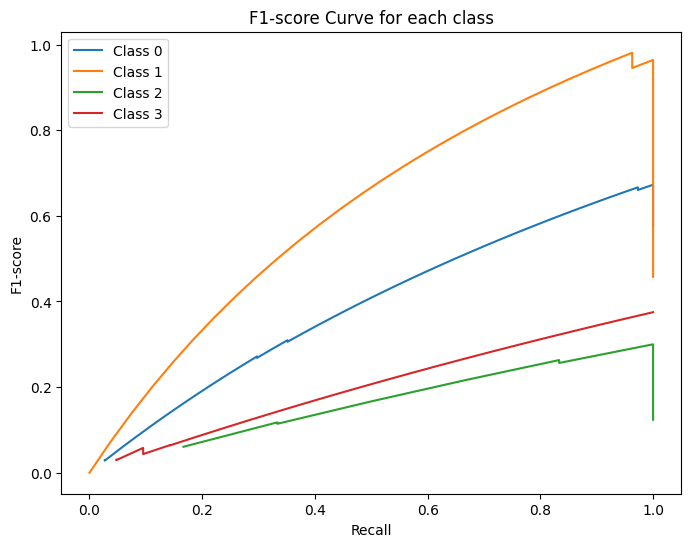

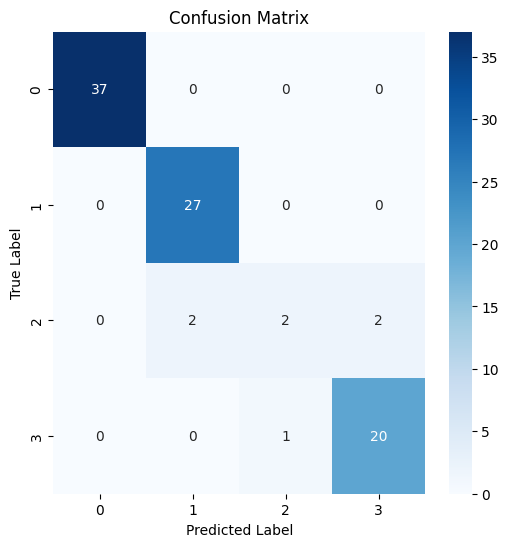

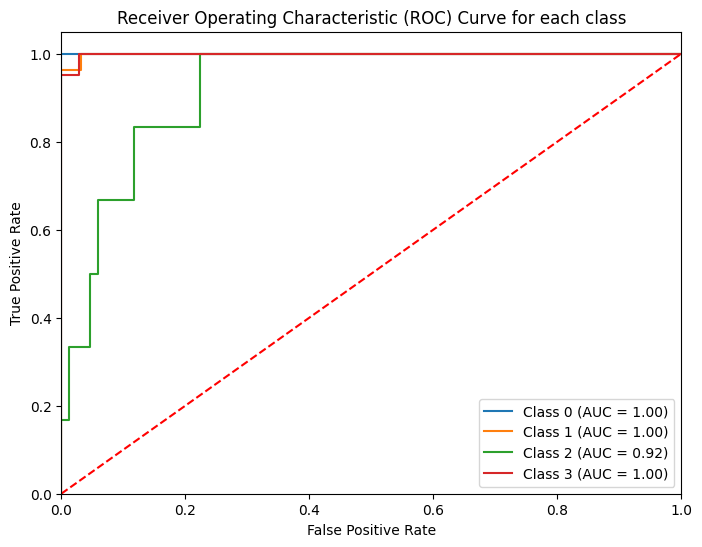

In [70]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000)

# Train the model
logistic_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_pred_probs = logistic_classifier.predict_proba(X_test)[:, 1]

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs  # Use the calculated y_pred_probs
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for class_label in classes:
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs)
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = logistic_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your classes are encoded as integers starting from 0
classes = np.unique(y_test)

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9230769230769231
Weighted Precision: 0.9389140271493213
Micro Precision: 0.9230769230769231
Macro Precision: 0.9485294117647058
Precision per class: [1.         0.79411765 1.         1.        ]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.79      1.00      0.89        27
           2       1.00      0.17      0.29         6
           3       1.00      0.90      0.95        21

    accuracy                           0.92        91
   macro avg       0.95      0.77      0.78        91
weighted avg       0.94      0.92      0.91        91



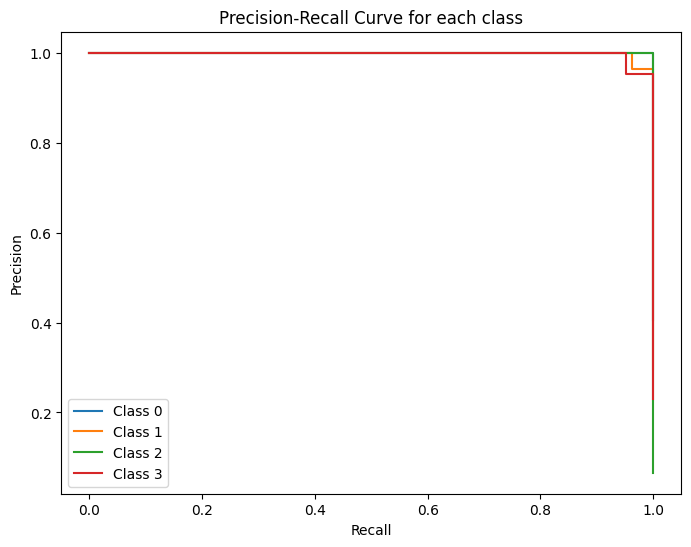

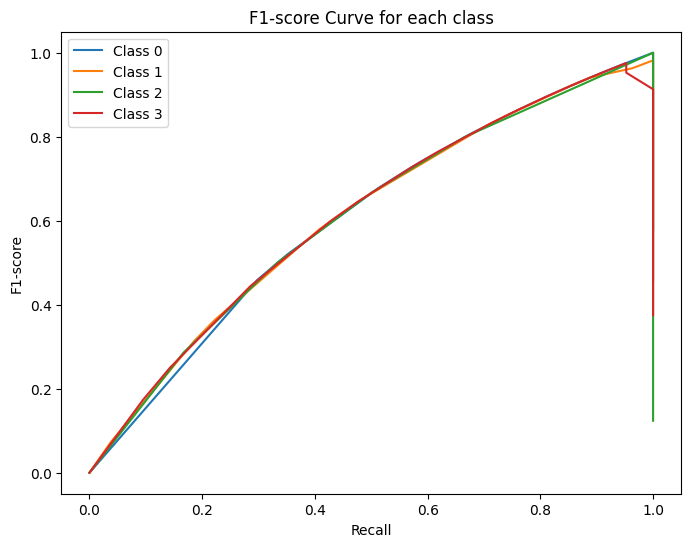

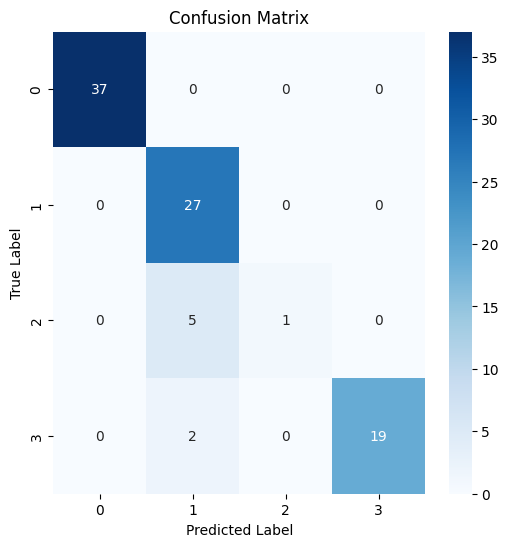

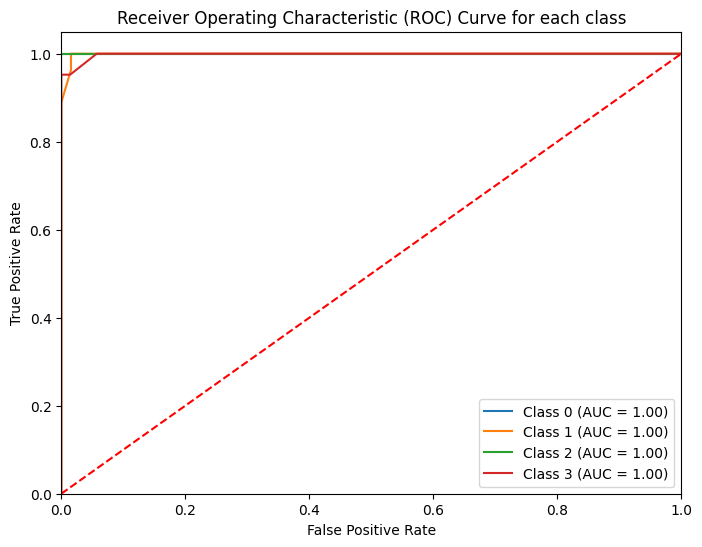

In [77]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = random_forest_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate predicted probabilities for ROC and Precision-Recall curves
y_pred_probs = random_forest_classifier.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    class_probs = y_pred_probs[:, i]
    precision, recall, _ = precision_recall_curve(y_binary, class_probs)
    plt.step(recall, precision, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend()
plt.show()

# Plot F1-score curve
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    y_binary = (y_test == class_label).astype(int)
    precision, recall, _ = precision_recall_curve(y_binary, y_pred_probs[:, i])
    f1_values = 2 * (precision * recall) / (precision + recall)
    plt.plot(recall, f1_values, label=f'Class {class_label}')

plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve for each class')
plt.legend()
plt.show()

# Plot Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()
